In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
import statsmodels.api as sm

In [ ]:
data = pd.read_excel('/content/5.xlsx', index_col='Year')


In [ ]:
data

,District ID,District,Longitude,Latitude,Slope,Soil Type,LULC,Temperature,Rainfall,Groundwater Recharge
Year,,,,,,,,,,
1986,14,Sri Muktsar Sahib,74.5,30,0.784844,Builtup,Agriculture,29.047504,2.791673,0.184225
1987,14,Sri Muktsar Sahib,74.5,30,0.784844,Builtup,Agriculture,30.706775,0.807422,-0.144755
1988,14,Sri Muktsar Sahib,74.5,30,0.784844,Builtup,Agriculture,29.350886,2.554090,-0.144507
1989,14,Sri Muktsar Sahib,74.5,30,0.784844,Builtup,Agriculture,29.163352,1.212855,-0.239687
1990,14,Sri Muktsar Sahib,74.5,30,0.784844,Builtup,Agriculture,29.260332,2.540788,-0.008424
1991,14,Sri Muktsar Sahib,74.5,30,0.784844,Builtup,Agriculture,36.047318,0.800337,-0.128606
1992,14,Sri Muktsar Sahib,74.5,30,0.784844,Builtup,Agriculture,35.104398,1.720188,-0.008235
1993,14,Sri Muktsar Sahib,74.5,30,0.784844,Builtup,Agriculture,29.579769,2.337262,0.775737
1994,14,Sri Muktsar Sahib,74.5,30,0.784844,Builtup,Agriculture,29.065820,2.274069,-0.176812


In [ ]:
data1=data.drop(['District','District ID','Latitude','Longitude'],axis=1)


In [ ]:
data1=pd.get_dummies(data1)

In [ ]:
data1.index = pd.to_datetime(data1.index, format='%Y')

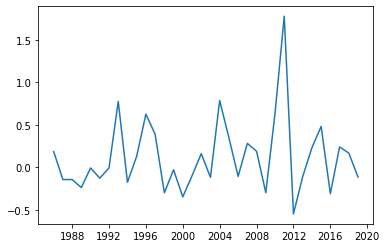

In [ ]:
plt.plot(data1['Groundwater Recharge'])
plt.show()

In [ ]:
train_data = data1.loc[:'2011']
test_data = data1.loc['2012':]

In [ ]:
model = sm.tsa.arima.ARIMA(train_data['Groundwater Recharge'], exog=train_data[['Slope', 'Temperature','Rainfall']], order=(1, 1, 1))
result = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
y_pred = result.forecast(len(test_data), exog=test_data[['Slope', 'Temperature','Rainfall']])

In [ ]:
mse = mean_squared_error(test_data['Groundwater Recharge'], y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.383618047031672


In [ ]:
y_pred

2012-01-01    0.668656
2013-01-01    0.625241
2014-01-01    0.486446
2015-01-01    0.483387
2016-01-01    0.454848
2017-01-01    0.436012
2018-01-01    0.473576
2019-01-01    0.392652
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
data1['LULC'].replace('Agriculture',)

array(['Agriculture', 'Builtup'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
target_variable = 'Groundwater Recharge'

In [ ]:
train_data = data1[:int(0.8 * len(data1))]
test_data = data1[int(0.8 * len(data1)):]

In [ ]:
data1.columns

Index(['Slope', 'Temperature', 'Rainfall', 'Groundwater Recharge',
       'Soil Type_Builtup', 'LULC_Agriculture', 'LULC_Builtup'],
      dtype='object')

In [ ]:
features = ['Rainfall', 'Temperature', 'Soil ', 'LULC', 'soil_type']